In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

In [3]:
parquet_file_path = "/Users/zzyun/Documents/GitHub/csc369/week3/2022pyarrow.parquet"
polars_df = pl.scan_parquet(parquet_file_path)

In [4]:
top_tooth = polars_df.with_columns(
    pl.col("timestamp").dt.date().alias("Date"), 
    pl.col("timestamp").dt.day().alias("Day"), 
    pl.col("timestamp").dt.hour().alias("hour"),
    pl.col("timestamp").dt.minute().alias("minute"),
    pl.col("timestamp").dt.second().alias("second")
).filter(
    (pl.col("x") == 1852) & (pl.col("y") == 591)
).sort(
    pl.col("Day")
).collect()

bottom_tooth = polars_df.with_columns(
    pl.col("timestamp").dt.date().alias("Date"), 
    pl.col("timestamp").dt.day().alias("Day"), 
    pl.col("timestamp").dt.hour().alias("hour"),
    pl.col("timestamp").dt.minute().alias("minute"),
    pl.col("timestamp").dt.second().alias("second")
).filter(
    (pl.col("x") == 1853) & (pl.col("y") == 594)
).sort(
    pl.col("Day")
).collect()

In [5]:
last_day = top_tooth.filter(
    pl.col("Day") == 4
).group_by(
    pl.col("hour")
).agg(
    pl.col("timestamp").count().alias("Number of Placements")
).sort(
    pl.col("hour")
)

by_hour = last_day["hour"].to_list()
days_pixel_counts = last_day["Number of Placements"].to_list()

last_day2 = bottom_tooth.filter(
    pl.col("Day") == 4
).group_by(
    pl.col("hour")
).agg(
    pl.col("timestamp").count().alias("Number of Placements")
).sort(
    pl.col("hour")
)

by_hour2 = last_day2["hour"].to_list()
days_pixel_counts2 = last_day2["Number of Placements"].to_list()

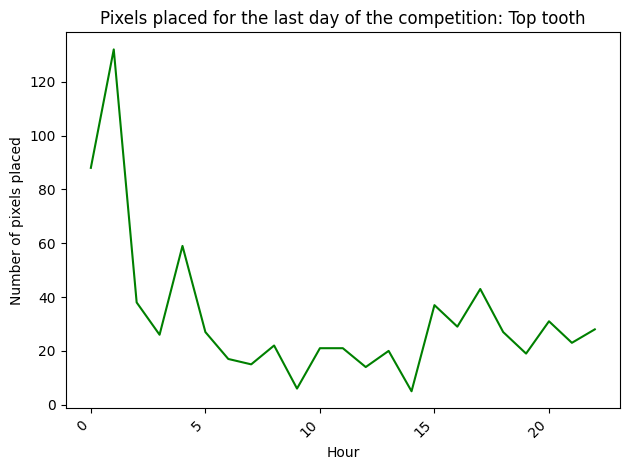

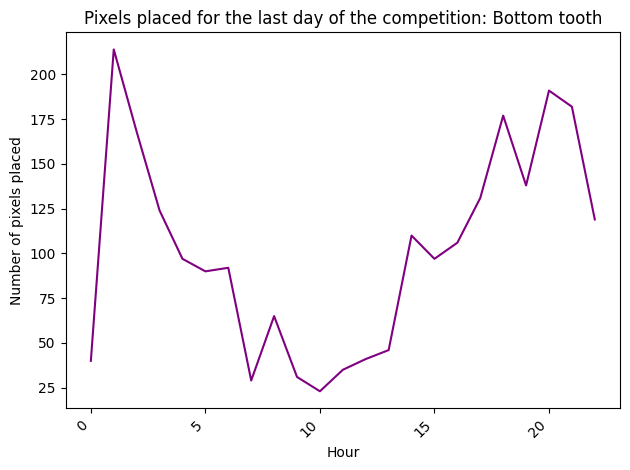

In [7]:
plt.plot(by_hour, days_pixel_counts, color="green")
plt.xlabel('Hour')
plt.ylabel('Number of pixels placed')
plt.title('Pixels placed for the last day of the competition: Top tooth')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

plt.plot(by_hour2, days_pixel_counts2, color="purple")
plt.xlabel('Hour')
plt.ylabel('Number of pixels placed')
plt.title('Pixels placed for the last day of the competition: Bottom tooth')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [ ]:
last_hour = top_tooth.filter(
    pl.col("hour") == 22
).group_by(
    pl.col("minute")
).agg(
    pl.col("timestamp").count().alias("Number of Placements")
).sort(
    pl.col("minute")
)

by_minute = last_hour["minute"].to_list()
minutes_pixel_counts = last_hour["Number of Placements"].to_list()

last_hour2 = bottom_tooth.filter(
    pl.col("hour") == 22
).group_by(
    pl.col("minute")
).agg(
    pl.col("timestamp").count().alias("Number of Placements")
).sort(
    pl.col("minute")
)

by_minute2 = last_hour2["minute"].to_list()
minutes_pixel_counts2 = last_hour2["Number of Placements"].to_list()

shape: (5, 2)
┌────────┬──────────────────────┐
│ minute ┆ Number of Placements │
│ ---    ┆ ---                  │
│ i8     ┆ u32                  │
╞════════╪══════════════════════╡
│ 4      ┆ 1                    │
│ 5      ┆ 2                    │
│ 6      ┆ 3                    │
│ 12     ┆ 3                    │
│ 17     ┆ 2                    │
└────────┴──────────────────────┘


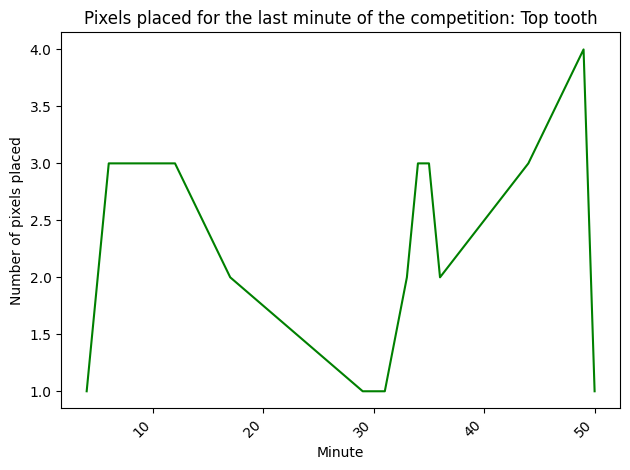

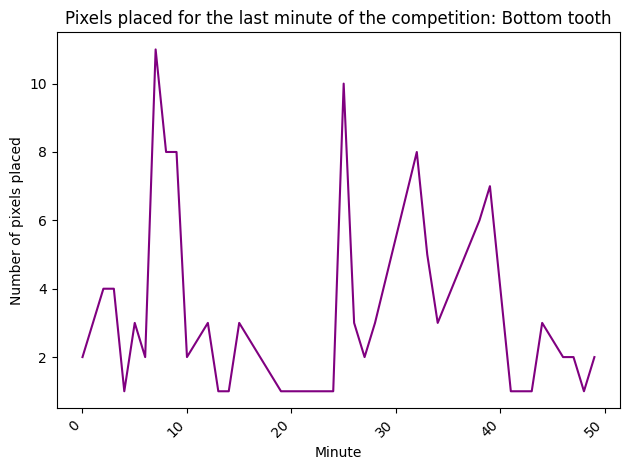

In [18]:
plt.plot(by_minute, minutes_pixel_counts, color="green")
plt.xlabel('Minute')
plt.ylabel('Number of pixels placed')
plt.title('Pixels placed for the last minute of the competition: Top tooth')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

plt.plot(by_minute2, minutes_pixel_counts2, color="purple")
plt.xlabel('Minute')
plt.ylabel('Number of pixels placed')
plt.title('Pixels placed for the last minute of the competition: Bottom tooth')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [17]:
last_minute = top_tooth.filter(
    pl.col("minute") == 50
).group_by(
    pl.col("second")
).agg(
    pl.col("timestamp").count().alias("Number of Placements")
).sort(
    pl.col("second")
)

by_second = last_minute["second"].to_list()
seconds_pixel_counts = last_minute["Number of Placements"].to_list()

last_minute2 = bottom_tooth.filter(
    pl.col("minute") == 50
).group_by(
    pl.col("second")
).agg(
    pl.col("timestamp").count().alias("Number of Placements")
).sort(
    pl.col("second")
)

by_second2 = last_minute2["second"].to_list()
seconds_pixel_counts2 = last_minute2["Number of Placements"].to_list()

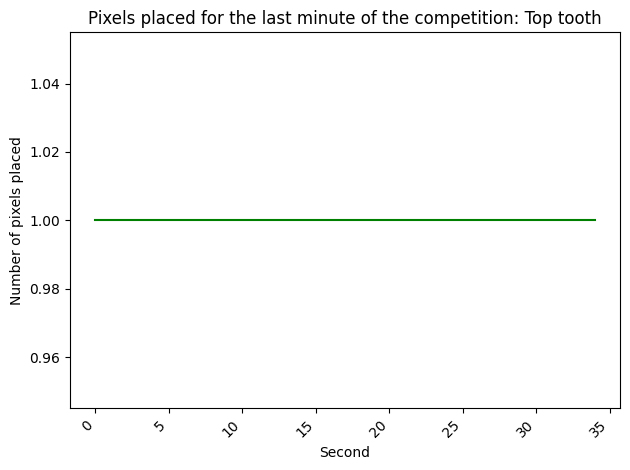

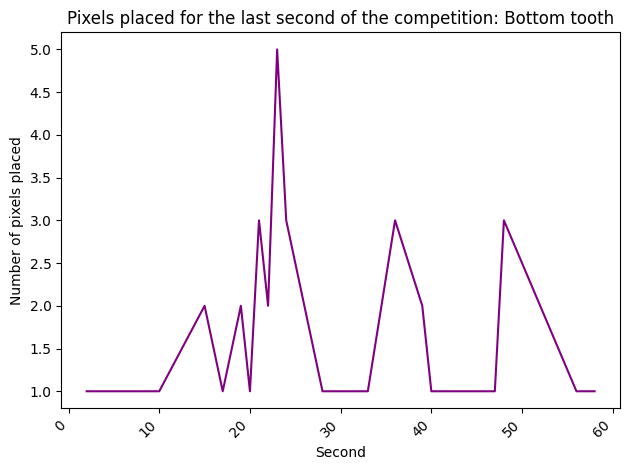

In [19]:
plt.plot(by_second, seconds_pixel_counts, color="green")
plt.xlabel('Second')
plt.ylabel('Number of pixels placed')
plt.title('Pixels placed for the last minute of the competition: Top tooth')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

plt.plot(by_second2, seconds_pixel_counts2, color="purple")
plt.xlabel('Second')
plt.ylabel('Number of pixels placed')
plt.title('Pixels placed for the last second of the competition: Bottom tooth')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [40]:
polars_df_with_days = polars_df.with_columns(
    pl.col("timestamp").dt.date().alias("Date"), 
    pl.col("timestamp").dt.day().alias("Day"), 
    pl.col("timestamp").dt.hour().alias("hour"),
    pl.col("timestamp").dt.minute().alias("minute"),
    pl.col("timestamp").dt.second().alias("second")
).filter(
    (pl.col("x") == 1852) & (pl.col("y") == 591) | (pl.col("x") == 1853) & (pl.col("y") == 594)
).sort(
    pl.col("Day")
).collect()

placements_by_day = polars_df_with_days \
    .with_columns(
        # Combine Date and hour into a single column with the format YYYY-MM-DD HH
        pl.format("{:04}-{:02}-{:02} {:02}", 
                  pl.col("timestamp").dt.year(),
                  pl.col("timestamp").dt.month(),
                  pl.col("timestamp").dt.day(),
                  pl.col("timestamp").dt.hour()).alias("Date_Hour")
    ) \
    .group_by([pl.col("Date_Hour")]) \
    .agg(pl.col("timestamp").count().alias("Number of Placements")) \
    .sort(pl.col("Date_Hour"))  # Sort by the new Date_Hour column

print(placements_by_day)




print(polars_df_with_days.head(5))

ValueError: number of placeholders should equal the number of arguments

In [34]:
placements_by_day = polars_df_with_days \
    .with_columns(
        pl.col("hour").cast(pl.Int64),  
        pl.col("Day").cast(pl.Int64)    
    ) \
    .group_by([pl.col("Day"), pl.col("hour")]) \
    .agg(pl.col("timestamp").count().alias("Number of Placements")) \
    .sort([pl.col("Day"), pl.col("hour")])  

print(placements_by_day.head(10))
# hours = placements_by_day["hour"].to_list()
# counts = placements_by_day["Number of Placements"].to_list()

# plt.plot(hours, counts, label="Time series of Kirby pixel placements over time")

shape: (10, 3)
┌─────┬──────┬──────────────────────┐
│ Day ┆ hour ┆ Number of Placements │
│ --- ┆ ---  ┆ ---                  │
│ i64 ┆ i64  ┆ u32                  │
╞═════╪══════╪══════════════════════╡
│ 2   ┆ 17   ┆ 1                    │
│ 2   ┆ 20   ┆ 1                    │
│ 2   ┆ 23   ┆ 1                    │
│ 3   ┆ 9    ┆ 2                    │
│ 3   ┆ 15   ┆ 3                    │
│ 3   ┆ 16   ┆ 13                   │
│ 3   ┆ 17   ┆ 3                    │
│ 3   ┆ 20   ┆ 4                    │
│ 3   ┆ 21   ┆ 1                    │
│ 3   ┆ 22   ┆ 3                    │
└─────┴──────┴──────────────────────┘
